# About The DataSet

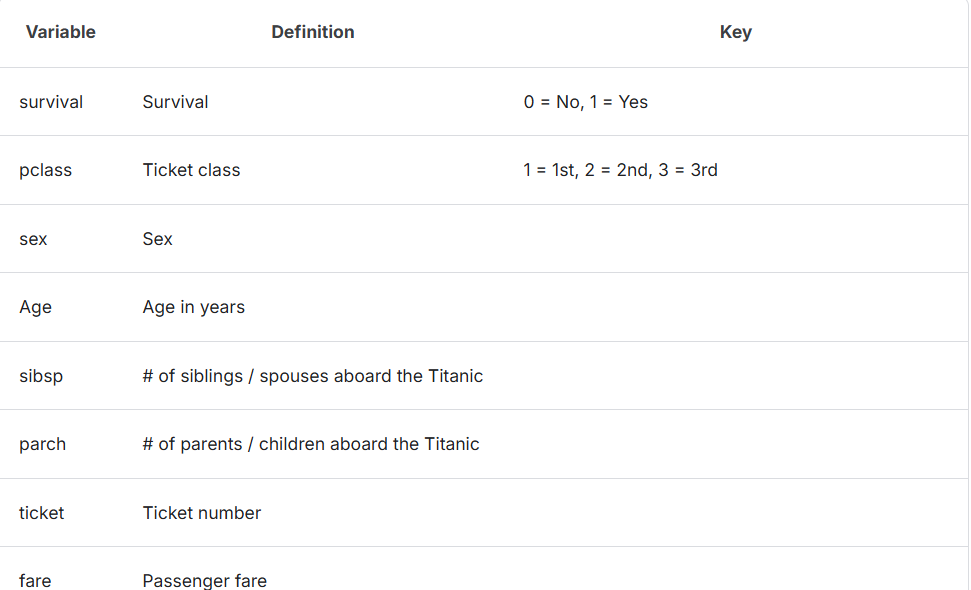
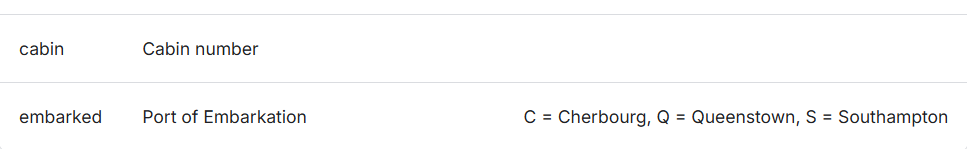

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Data Cleaning And Preprocessing

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [8]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [9]:
df.head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Checking data type,statistical properties,and null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning

I am gonna remove the attribute PassengerID,Name,Ticket because these attributes dont make sense for prediction i.e reduntdant features.

In [13]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Filling missing age value with median

In [15]:
df['Age'].fillna(df["Age"].median(),inplace=True)

/tmp/ipykernel_35/2154918442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].median(),inplace=True)


In [16]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [17]:
len(df)

891

In [18]:
print(f"The percentage of data missing in Cabin Attribute:{(df['Cabin'].isna().sum()/len(df))*100}%")

The percentage of data missing in Cabin Attribute:77.10437710437711%


We can clearly see the percentage of data missing in cabin attribute is 77% so it has more than 50% of its data missing further more from the common sense it doesnt make sense to fill the Cabin Attribute with median value because if you look at it from the real life perspective ,77 % (687 people out of 891 in this case) percent of the passenger living in the same cabin ? that is not possible because 687 people cant fit in a single cabin, so if you fill it up using median it will not make sense.
BUT if you fill that cabin information using KNN imputer it may make sense as it will use the concept of nearest neighbour but then again 77% of the data missing so it may not give good values so we are going to remove Cabin Attribute

In [52]:
df1 = df.copy()

In [53]:
df1.drop("Cabin",axis=1,inplace=True)

In [54]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [55]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Filling missing Embarked value with Mode

In [56]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_35/3504995024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)


In [57]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [58]:
len(df1)

891

### Converting categorical to numerical

In [59]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

# Initialize LabelEncoders
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

# Fit and transform
df1['Sex'] = sex_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = embarked_encoder.fit_transform(df1['Embarked'])


In [60]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [28]:
# Print class mappings
print("Class mapping for 'Sex':")
for i, cls in enumerate(sex_encoder.classes_):
    print(f"{cls} → {i}")

print("\nClass mapping for 'Embarked':")
for i, cls in enumerate(embarked_encoder.classes_):
    print(f"{cls} → {i}")

Class mapping for 'Sex':
female → 0
male → 1

Class mapping for 'Embarked':
C → 0
Q → 1
S → 2


### Normalizing the data

In [62]:
from sklearn.preprocessing import MinMaxScaler
M = MinMaxScaler()
f = ["Age","Fare"]
df1[f]=M.fit_transform(df1[f])

In [63]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


### Checking Box Plot

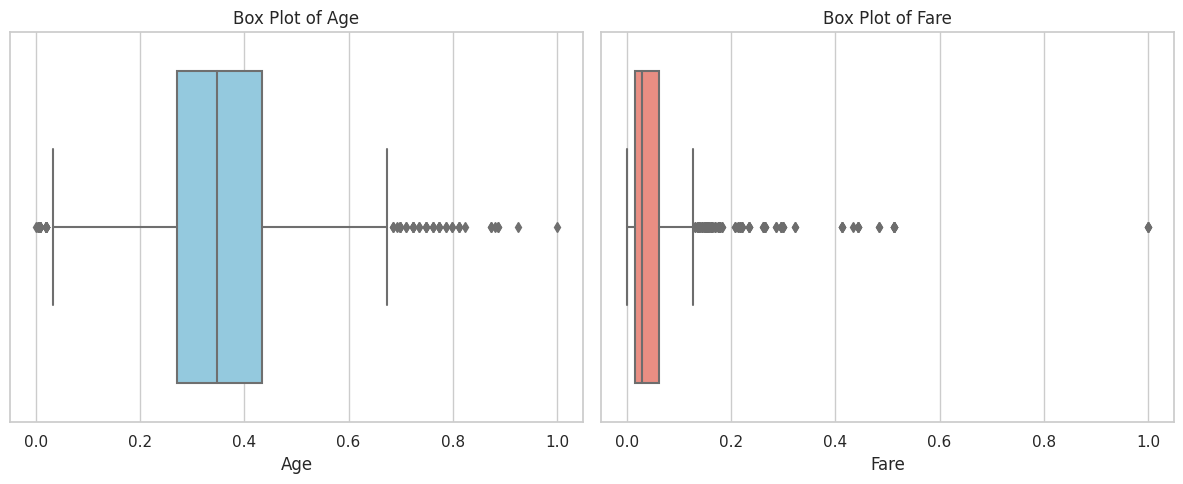

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 5))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['Age'], color='skyblue')
plt.title('Box Plot of Age')

# Box plot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Fare'], color='salmon')
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()

#### BOX PLOTS
Box plots are generally used to visualize the outliers using IQR.

In [67]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    l = q1 - 1.5*iqr
    h = q3+1.5*iqr
    return df[(df[col]>=l) &  (df[col]<=h)]


In [68]:
df1 = remove_outliers(df1,'Age')
df1 = remove_outliers(df1,'Fare')

In [69]:
len(df1)

638

In [70]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
2,1,3,0,0.321438,0,0,0.015469,2
4,0,3,1,0.434531,0,0,0.015713,2
5,0,3,1,0.346569,0,0,0.016510,1
8,1,3,0,0.334004,0,2,0.021731,2


In [71]:
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0
890,0,3,1,0.396833,0,0,0.015127,1


## EDA

In [72]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.297806,2.600313,0.692790,0.342945,0.371473,0.297806,0.028270,1.605016
std,0.457652,0.642649,0.461699,0.104858,0.824432,0.789866,0.018567,0.724611
min,0.000000,1.000000,0.000000,0.070118,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015330,1.000000
50%,0.000000,3.000000,1.000000,0.346569,0.000000,0.000000,0.018945,2.000000
75%,1.000000,3.000000,1.000000,0.384267,0.000000,0.000000,0.039928,2.000000
max,1.000000,3.000000,1.000000,0.610455,5.000000,6.000000,0.091933,2.000000


##

### Histograms

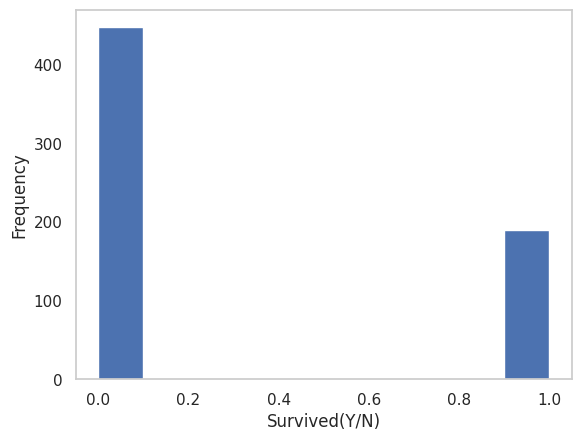

In [112]:
plt.hist(df1['Survived'])
plt.xlabel("Survived(Y/N)")
plt.ylabel("Frequency")
plt.grid()
plt.savefig('fig1.png')

In [74]:
print("Percentage of people that died: {:.2f}%".format((len(df1[df1['Survived'] == 0]) / len(df1)) * 100))
print("Percentage of people that survived: {:.2f}%".format((len(df1[df1['Survived'] == 1]) / len(df1)) * 100))



Percentage of people that died: 70.22%
Percentage of people that survived: 29.78%


There is class imbalance between 0 and 1

In [51]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
5,0,3,1,0.346569,0,0,0.016510,1
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


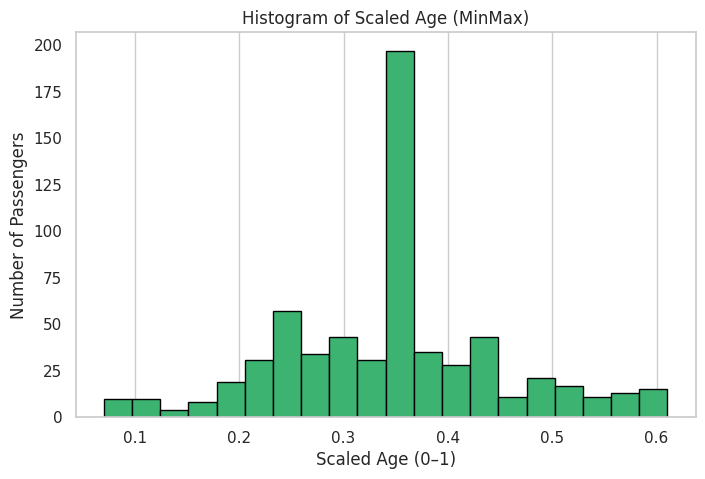

<Figure size 640x480 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt

# Plot histogram of MinMax scaled Age
plt.figure(figsize=(8, 5))
plt.hist(df1['Age'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Histogram of Scaled Age (MinMax)')
plt.xlabel('Scaled Age (0–1)')
plt.ylabel('Number of Passengers')
plt.grid(axis='y')
plt.show()
plt.savefig('fig2.png')

Majority of passenger were between age 30 and 40

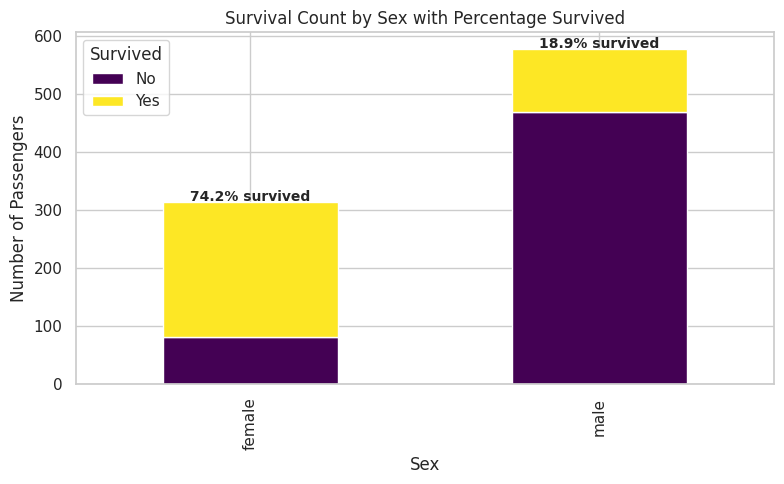

<Figure size 640x480 with 0 Axes>

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Crosstab of Sex vs Survived
z = pd.crosstab(df['Sex'], df['Survived'])

# Plot the stacked bar chart
ax = z.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))

# Labeling
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Sex with Percentage Survived')

# Calculate and annotate percentage survived
# z.index returns ['female','male']
for i, sex in enumerate(z.index): # we get the i and sex from enumeration of z.index
    total = z.loc[sex].sum() # we locate the sex on z and sum it up to get toal
    survived = z.loc[sex, 1] if 1 in z.columns else 0  # z.loc[sex,1] will give the number of ppl of that gender that survived 
    percentage = (survived / total) * 100
    plt.text(i, total + 2, f'{percentage:.1f}% survived', ha='center', fontsize=10, fontweight='bold')

plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
plt.savefig('fig3.png')

So we see that out of total women ,majority of women survived that is 74.2 % survived while out of total men only 18.9 % survived.......

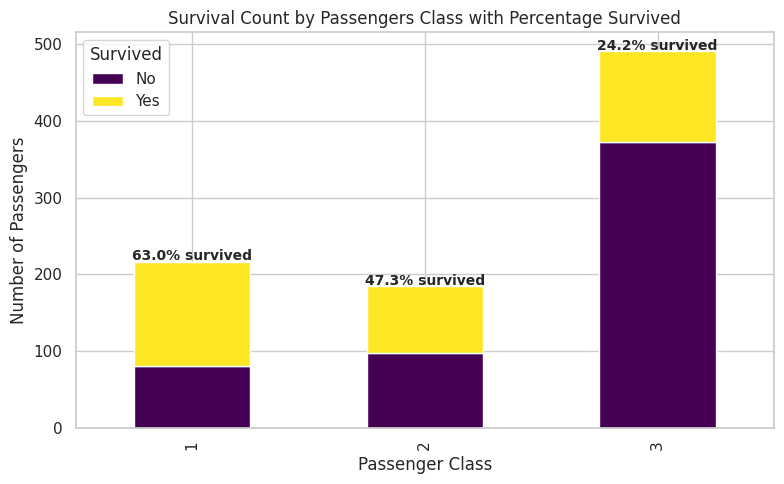

<Figure size 640x480 with 0 Axes>

In [115]:
# Crosstab of Sex vs Survived
z = pd.crosstab(df['Pclass'], df['Survived'])

# Plot the stacked bar chart
ax = z.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))

# Labeling
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Passengers Class with Percentage Survived')

# Calculate and annotate percentage survived
# z.index returns [1,2,3]
for i, v in enumerate(z.index): # we get the i and sex from enumeration of z.index
    total = z.loc[v].sum() # we locate the sex on z and sum it up to get toal
    survived = z.loc[v, 1] if 1 in z.columns else 0  # z.loc[sex,1] will give the number of ppl of that gender that survived 
    percentage = (survived / total) * 100
    plt.text(i, total + 2, f'{percentage:.1f}% survived', ha='center', fontsize=10, fontweight='bold')

plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
plt.savefig('fig4.png')


From the Above Graph we get the idea that majority of passengers with first class survived while thats not the case for 2nd or 3rd class passengers..

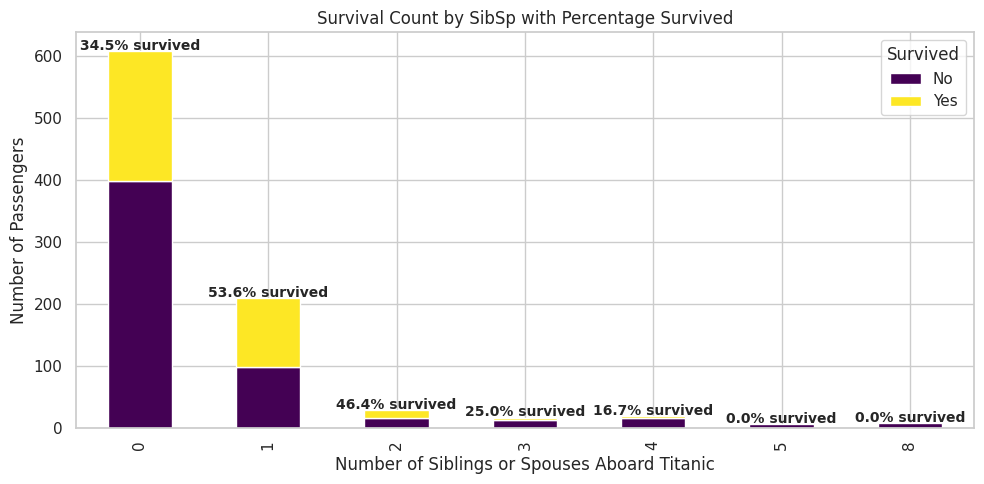

In [96]:
# Crosstab of Sex vs Survived
z = pd.crosstab(df['SibSp'], df['Survived'])

# Plot the stacked bar chart
ax = z.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 5))

# Labeling
plt.xlabel('Number of Siblings or Spouses Aboard Titanic')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by SibSp with Percentage Survived')

# Calculate and annotate percentage survived
# z.index returns [1,2,3]
for i, v in enumerate(z.index): # we get the i and sex from enumeration of z.index
    total = z.loc[v].sum() # we locate the sex on z and sum it up to get toal
    survived = z.loc[v, 1] if 1 in z.columns else 0  # z.loc[sex,1] will give the number of ppl of that gender that survived 
    percentage = (survived / total) * 100
    plt.text(i, total + 2, f'{percentage:.1f}% survived', ha='center', fontsize=10, fontweight='bold')

plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


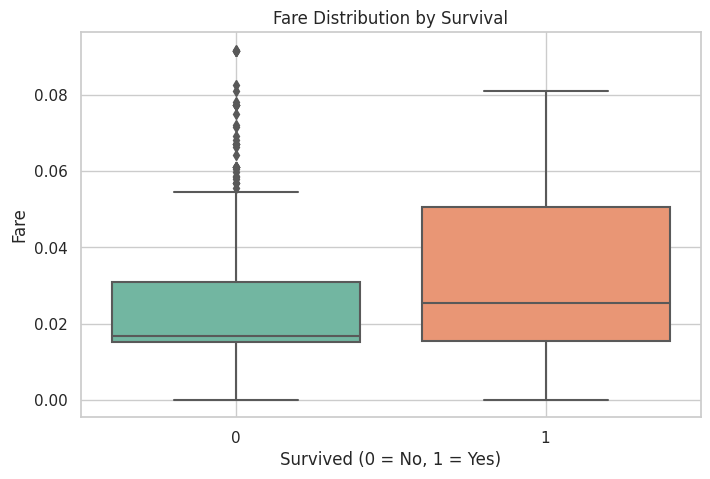

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df1, palette='Set2')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

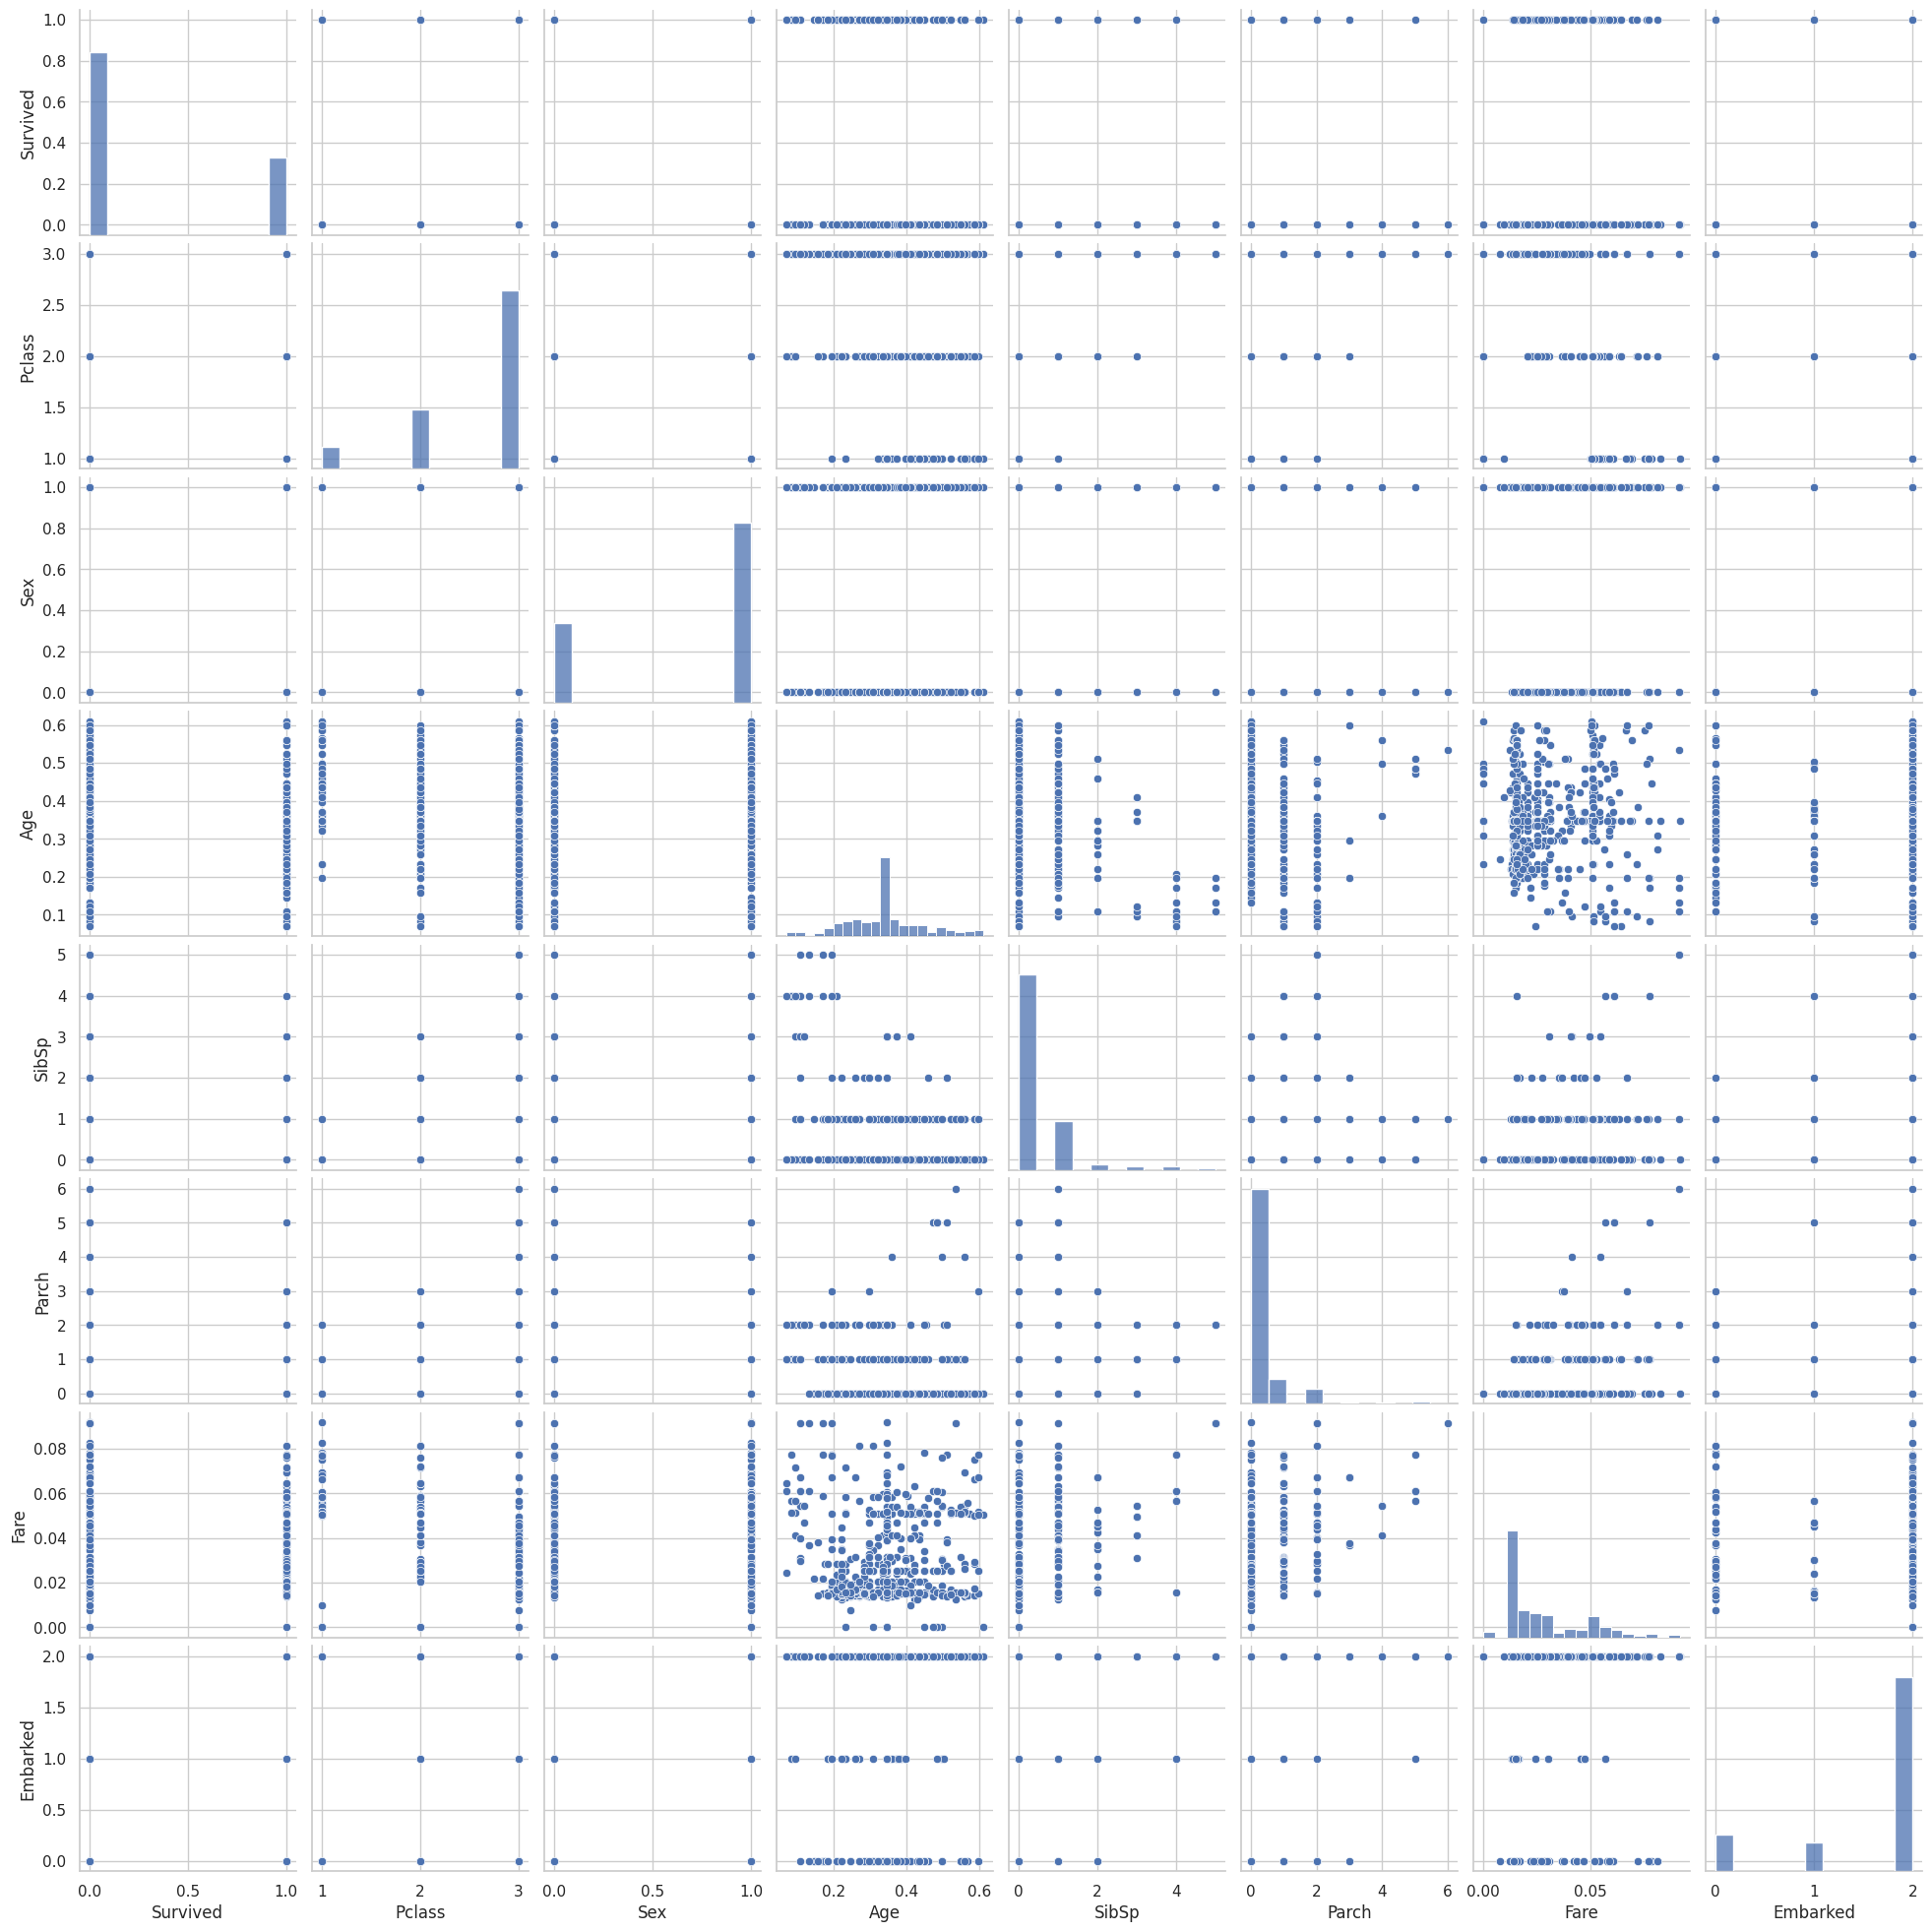

In [103]:
import seaborn as sns
sns.pairplot(df1)

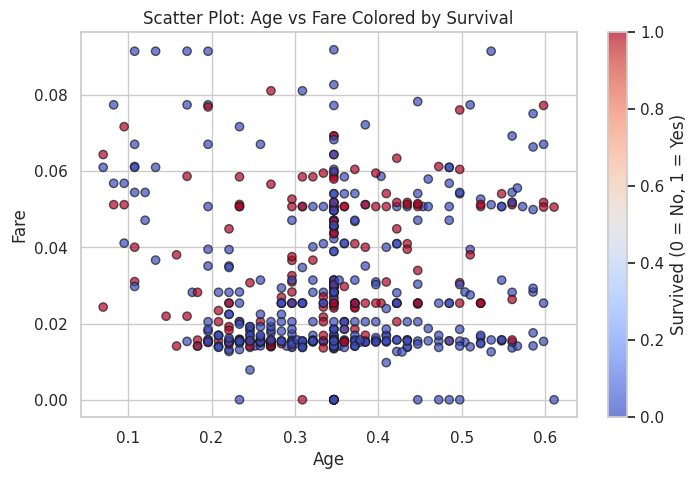

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
scatter = plt.scatter(df1['Age'], df1['Fare'], c=df1['Survived'], cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare Colored by Survival')
plt.colorbar(scatter, label='Survived (0 = No, 1 = Yes)')
plt.grid(True)
plt.show()


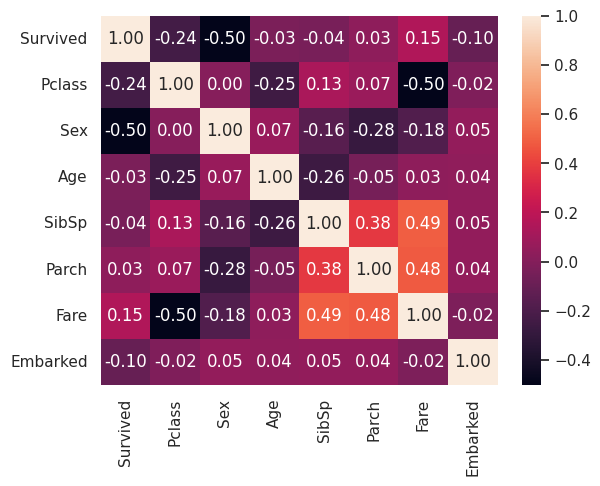

In [116]:
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.savefig('fig5.png')

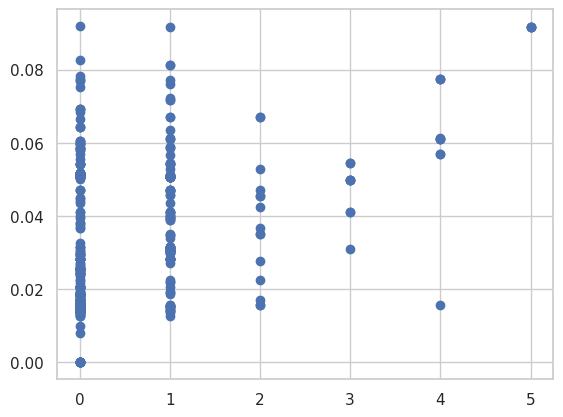

In [109]:
plt.scatter(df1['SibSp'],df1['Fare'])

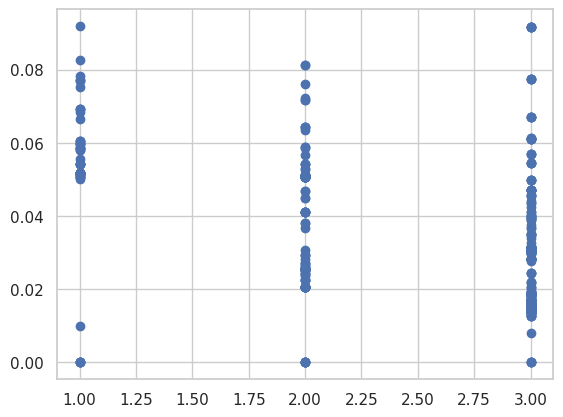

In [111]:
plt.scatter(df1['Pclass'],df1['Fare'])

So we see that Fare has negative correlation with Pclass that is Fare increasing Pclass decreasing which is consistent as fare is higher for first class..

#### Summary

🚢 Titanic Dataset - EDA Summary

1️⃣ Gender and Survival Rate

👩‍🦱 Observation: Women had a significantly higher survival rate compared to men.

🔍 Insight: This shows a negative correlation between the 'Sex' feature (male = 1, female = 0) and the Survived variable.

🧠 Implication: Gender influenced survival due to the "women and children first" policy.

2️⃣ Passenger Class and Survival

🏰 Observation: Passengers in 1st class had better chances of survival than those in 2nd or 3rd class.

📊 Insight: Indicates a positive correlation between higher class and survival.

💼 Implication: Socioeconomic status played a crucial role in survival outcomes.


3️⃣ Fare vs. Passenger Class

💰 Observation: A negative correlation exists between 'Fare' and 'Pclass'.

📉 Insight: Higher fares were typically paid by 1st class passengers (Pclass = 1).

💸 Implication: Fare acts as a proxy for socio-economic status and thus survival likelihood.


4️⃣ Feature Correlations (Heatmap Insights)

👨‍👩‍👧‍👦 SibSp ↔️ Parch: Positive correlation — families often traveled together.

🧳 SibSp ↔️ Fare: Mild correlation — possibly group ticketing patterns.

🎟️ Fare ↔️ Pclass: Strong negative correlation — higher-class, higher fare.

🚹 Parch ↔️ Sex: Some correlation — may reflect group behavior or dataset bias.